## Import and directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655/';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655/


In [2]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

In [7]:
os.chdir(parentdir)
!python analysis_version_6.py
%run analysis_version_6.py

### Figure Parameters

In [4]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## List of Points

In [19]:
def point_list(foldername = homedir, pointnumbers=range(100)):
    df_datn_emplot, df_FCS, folderpath = dir_mV_molNo(foldername=homedir)
    df_datn_specific = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]
    df_groupby = df_datn_specific.groupby(['Point number'])
    out_total = pd.DataFrame()
    for name, group in df_groupby:
        temp = df_groupby.get_group(name)
        temp = temp['Potential']
        df_point = pd.DataFrame(sort(array(temp)), columns=['Point_'+str(int(name))])
        out_total=pd.concat([out_total, df_point], axis=1);
    out_total = out_total.replace(np.nan, '', regex=True)
    return(out_total)
pointlist=point_list()
pointlist.ix[:, :20]

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_14,Point_15,Point_16,Point_18,Point_19,Point_20,Point_21,Point_22
0,0,0,0,0.0,0,75,0.0,0,0.0,0.0,0,40,0.0,75,75,75,0,0,0.0,0
1,20,20,25,10.0,10,100,10.0,10,10.0,10.0,10,60,10.0,100,,100,25,25,10.0,20
2,25,25,50,20.0,20,,20.0,20,20.0,20.0,20,75,20.0,,,,50,40,20.0,25
3,40,40,50,25.0,25,,25.0,25,25.0,25.0,25,80,25.0,,,,75,50,25.0,40
4,50,50,60,40.0,40,,40.0,40,40.0,40.0,40,100,40.0,,,,100,50,40.0,50
5,50,50,75,50.0,50,,50.0,50,50.0,50.0,50,,50.0,,,,,60,50.0,50
6,60,60,80,50.0,60,,50.0,60,50.0,50.0,60,,50.0,,,,,75,50.0,60
7,75,70,100,60.0,70,,60.0,70,60.0,60.0,70,,60.0,,,,,100,60.0,75
8,80,75,,70.0,75,,70.0,75,70.0,70.0,75,,70.0,,,,,,70.0,80
9,100,80,,75.0,80,,75.0,80,75.0,75.0,80,,75.0,,,,,,75.0,100


In [20]:
pointlist.ix[:, 20:]

,Point_23,Point_24
0,10,50
1,20,75
2,40,100
3,50,
4,70,
5,75,
6,100,
7,,
8,,
9,,


Fit ON time histogram: 28.4220415525 * e^{-13.5296505327 t}
Fit OFF time histogram: -66.5329817121 * e^{-105.546414165 t} - -52.5867395594 * e^{-21.7288403573 t}


()

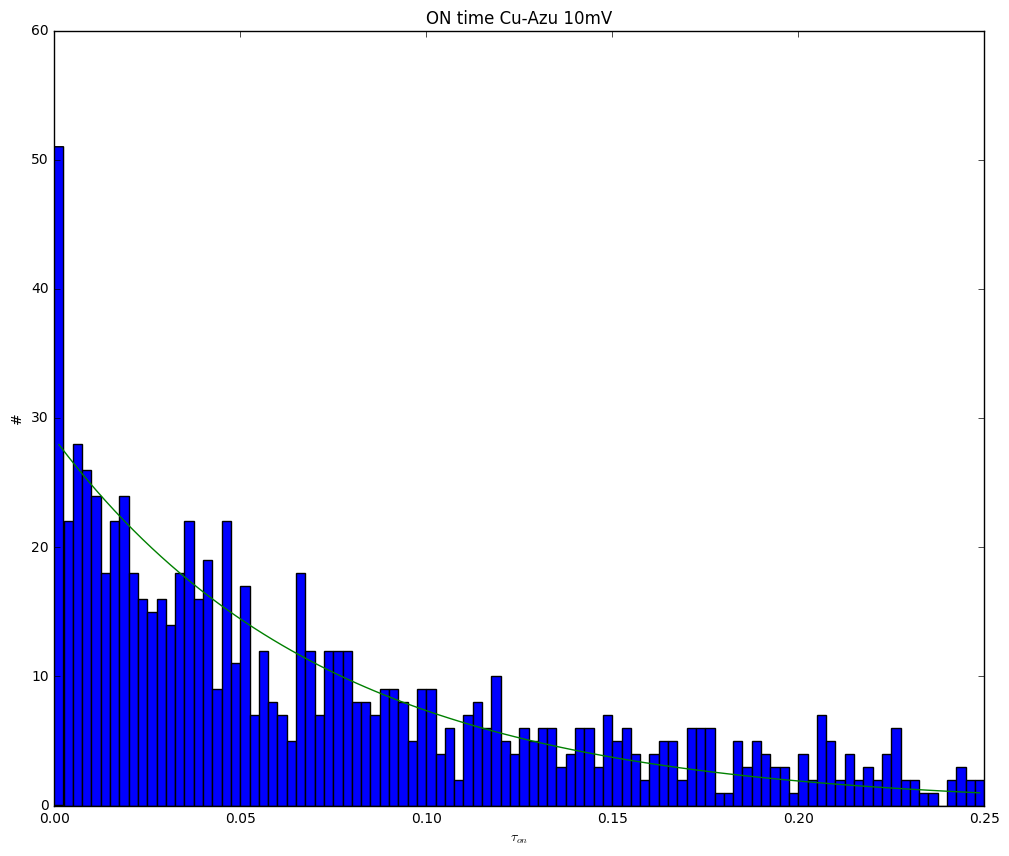

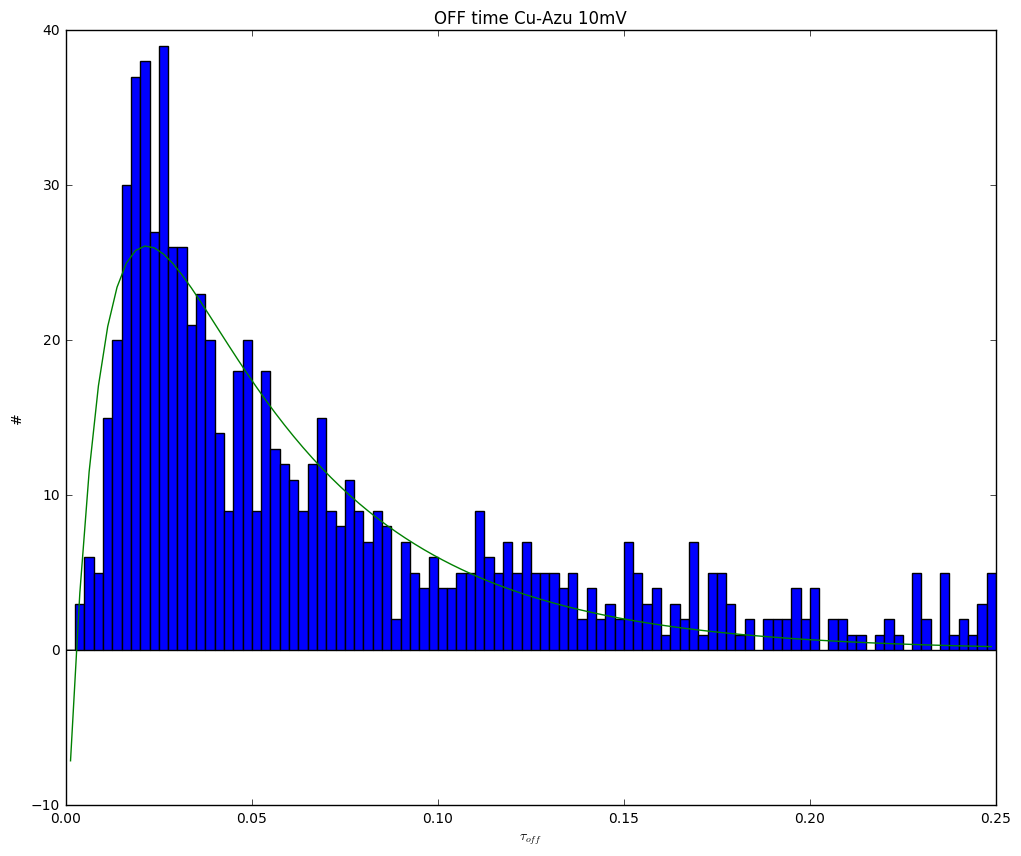

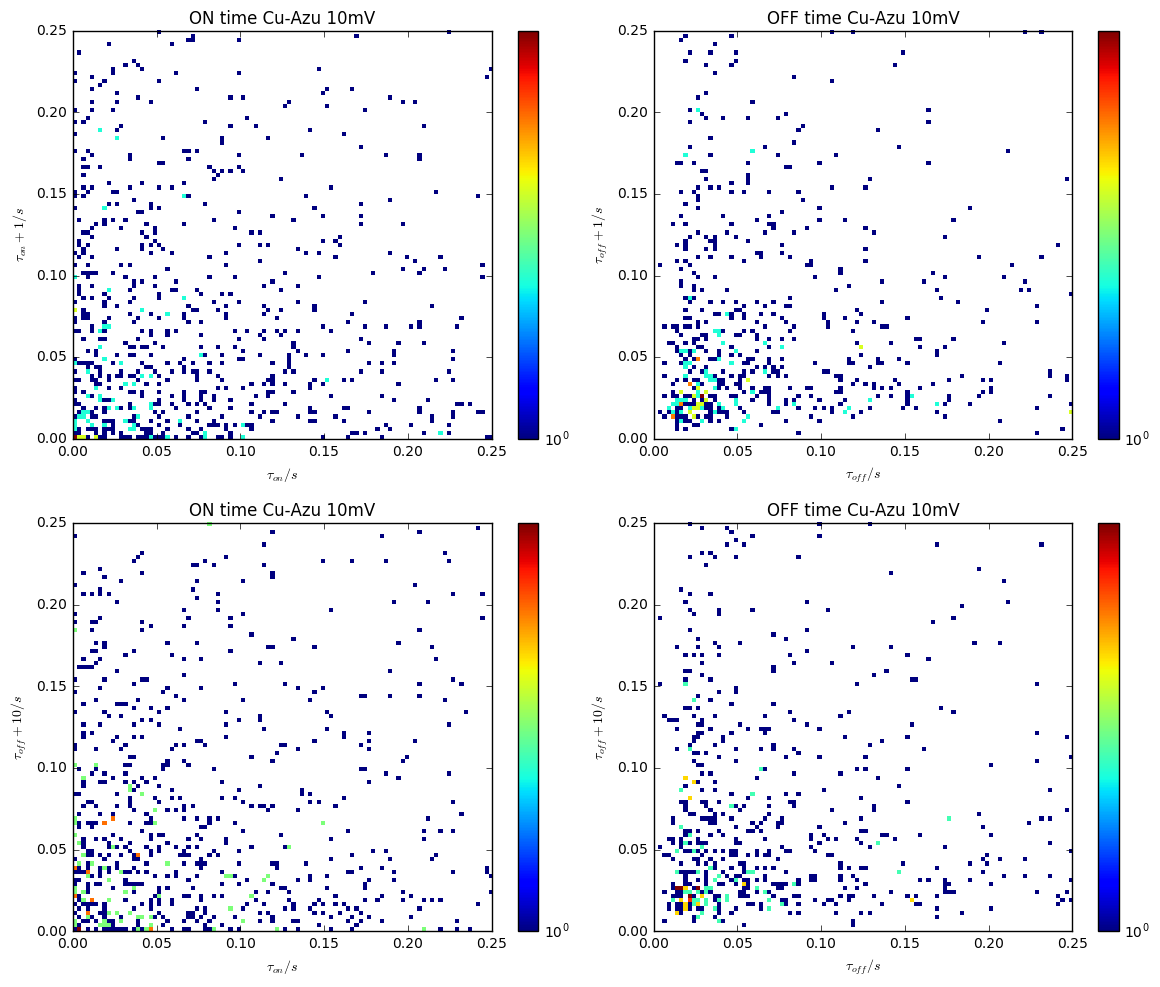

In [8]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 10 #the specific potential you want the plots for
onMax=0.25;offMax=0.25;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 100  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = directory#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(titel, pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift)

In [9]:
os.chdir(parentdir)
!python analysis_version_9.py
%run analysis_version_9.py

()

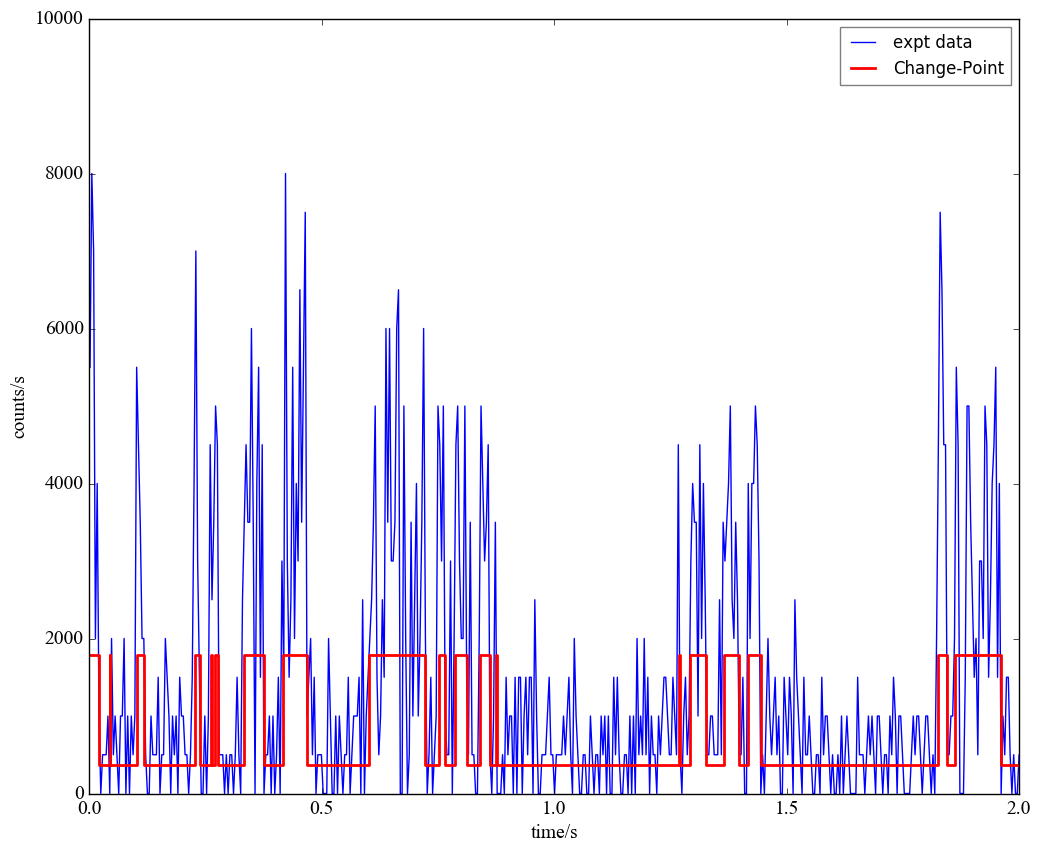

In [11]:
#************* data and changepoint plot********************
os.chdir(directory);os.chdir("Point_A2_60.5__30s_1/data/")
file1 = 'Point_A1_000mV(9)_60.5__30s_1.pt3.datn'
file2 = 'Point_A1_000mV(9)_60.5__30s_1.pt3.datn.em.plot'
x_lim_min = 0
x_lim_max = 2
y_lim_min = 0
y_lim_max = 10000

time_trace_plot(file1, file2, x_lim_min, x_lim_max, y_lim_min, y_lim_max)

In [32]:
#************* t_on t_off^(-1) vs potential********************
os.chdir(parentdir)
!python analysis_version_9.py
%run analysis_version_9.py

pointnumbers = 31 #Change this to the minimal amount of points
pot = 11 #number of potentials
current_dir = directory #foldername you want to work in.
for i in range(24):
    protein_amount = i #number of proteins you want to be plotted (will plot the first x proteins)
    t_ratio(pot, pointnumbers, current_dir, protein_amount)


()

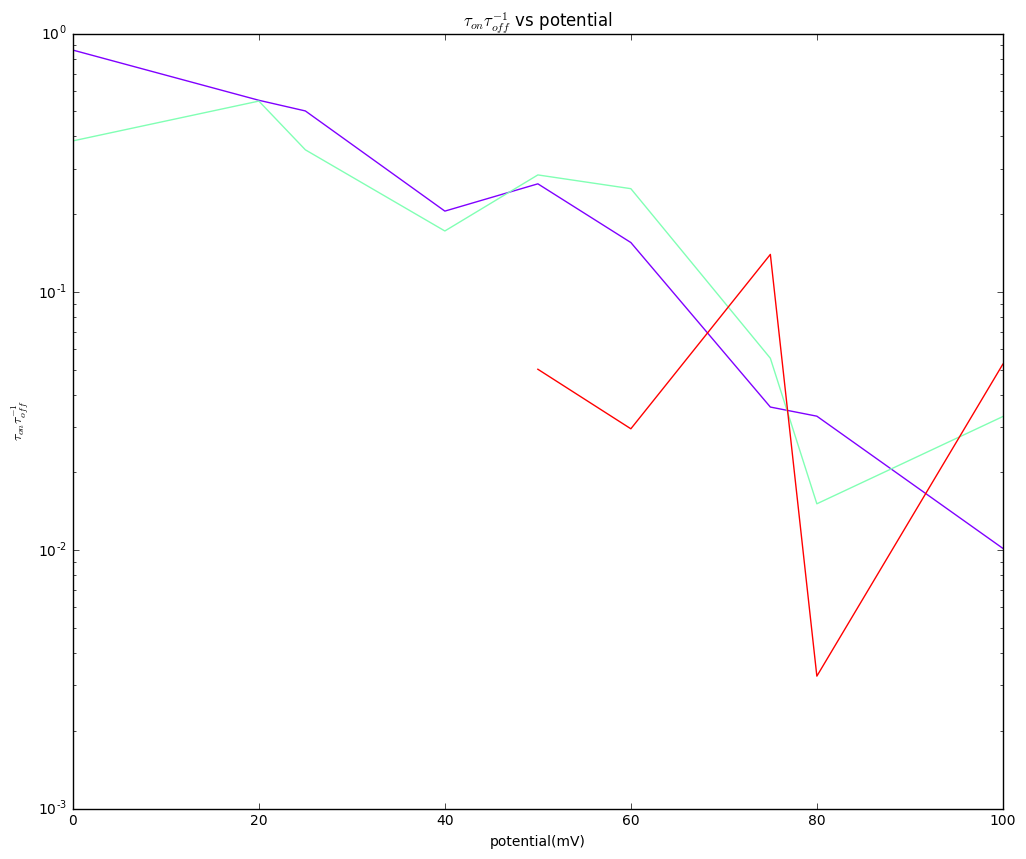

In [35]:
#************* t_on t_off^(-1) vs potential********************
# os.chdir(parentdir)
# !python analysis_version_9.py
# %run analysis_version_9.py

pointnumbers = 31 #Change this to the minimal amount of points
pot = 11 #number of potentials
current_dir = directory #foldername you want to work in.
protein_amount = 3 #number of proteins you want to be plotted (will plot the first x proteins)
t_ratio(pot, pointnumbers, current_dir, protein_amount)